In [18]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
#importing libraries
import numpy as np 
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import wave

In [27]:
# reading dataset and feature extraction
def extract_audio(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    audio = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return audio

In [31]:
#load emotion speech dataset 
emotion_speech_labels = [] # to save extracted label
emotion_speech_data = [] # to save extracted features
subset_dirs_list = ['Actor_01', 'Actor_02', 'Actor_03','Actor_04', 'Actor_05', 'Actor_06','Actor_07', 'Actor_08']

for dirname, dirs, filenames in os.walk(r"C:\Users\91958\Downloads\archive (2)"):
    #dirs[:] = [d for d in dirs if d in subset_dirs_list] # you can remove it to train the model over the entire dataset 
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        emotion_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        emotion_speech_data.append(extract_audio(wav_file_name))

In [34]:
pip install keras

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
      --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.7 MB 751.6 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.7 MB 751.6 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 888.4 kB/s eta 0:00:02
     ----- ---------------------------------- 0.2/1.7 MB 981.9 kB/s eta 0:00:02
     ------- -------------------------------- 0.3/1.7 MB 1.1 MB/s eta 0:00:02
     -------- ------------------------------- 0.4/1.7 MB 998.3 kB/s eta 0:00:02
     ------------ --------------------------- 0.5/1.7 MB 1.2 MB/s eta 0:00:01
     -------------- ------------------------- 0.6/1.7 MB 1.3 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.7 MB 1.5 MB/s eta 0:00:01
     ------------------- -------------------- 0.8/1.7 MB 1.5 


[notice] A new release of pip is available: 23.0.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# improting libraries for lstm
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop

In [37]:
#convert data and label to array
emotion_speech_data_array = np.asarray(emotion_speech_data) # convert the input to an array
emotion_speech_label_array = np.array(emotion_speech_labels)
emotion_speech_label_array.shape

#### make categorical labels
labels_categorical = to_categorical(emotion_speech_label_array)
emotion_speech_data_array.shape
labels_categorical.shape
print(emotion_speech_label_array.shape, emotion_speech_data_array.shape, labels_categorical.shape)

(1440,) (1440, 40) (1440, 8)


In [42]:
# test and train classification in LSTM
number_of_samples = emotion_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [43]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [47]:
#train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(emotion_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(emotion_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=250, shuffle=True)

Epoch 1/250
36/36 [==============================] - 2s 32ms/step - loss: 2.0797 - accuracy: 0.1510 - val_loss: 2.0715 - val_accuracy: 0.1389
Epoch 2/250
36/36 [==============================] - 1s 19ms/step - loss: 2.0583 - accuracy: 0.1701 - val_loss: 2.0615 - val_accuracy: 0.1597
Epoch 3/250
36/36 [==============================] - 1s 19ms/step - loss: 2.0399 - accuracy: 0.1832 - val_loss: 2.0200 - val_accuracy: 0.1458
Epoch 4/250
36/36 [==============================] - 1s 21ms/step - loss: 2.0122 - accuracy: 0.2023 - val_loss: 2.0075 - val_accuracy: 0.2014
Epoch 5/250
36/36 [==============================] - 1s 22ms/step - loss: 2.0012 - accuracy: 0.2066 - val_loss: 1.9912 - val_accuracy: 0.2153
Epoch 6/250
36/36 [==============================] - 1s 21ms/step - loss: 1.9641 - accuracy: 0.2378 - val_loss: 2.0027 - val_accuracy: 0.1458
Epoch 7/250
36/36 [==============================] - 1s 21ms/step - loss: 1.9459 - accuracy: 0.2483 - val_loss: 2.0157 - val_accuracy: 0.1875
Epoch 

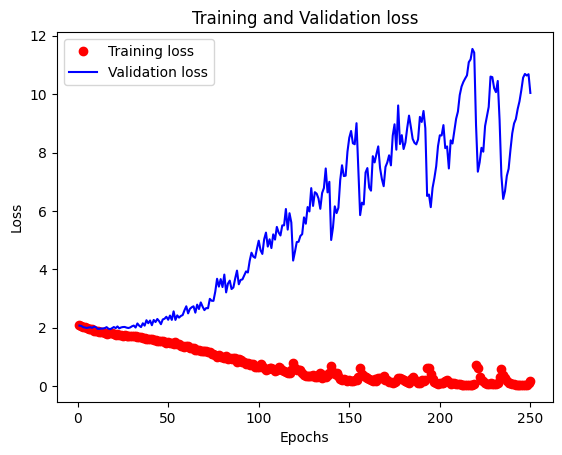

In [50]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

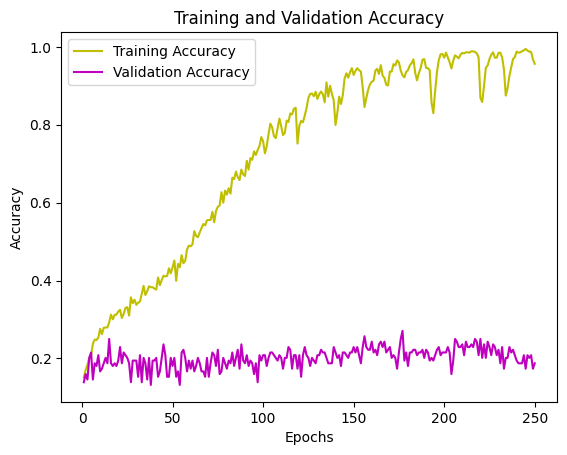

In [52]:
### accuracy plots using LSTM model
plt.clf()                                                
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'm', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()